# Task:

Sketch the decision boundary of an SVM with a quadratic kernel (polynomial with degree
2) for the data in the figure below, for two specified values of the penalty parameter C. (The two classes
are denoted as •’s and ×’s.)

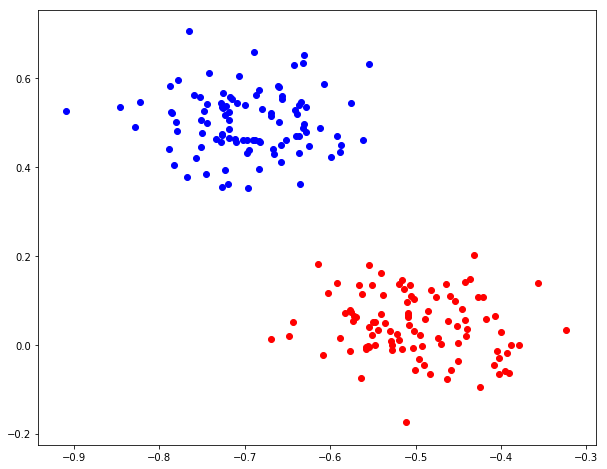

In [62]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs, make_gaussian_quantiles

N = 100  # number of samples
D = 2  # number of dimensions
C = 2  # number of classes
# seed = 10  # for reproducible experiments

X, y = make_gaussian_quantiles(mean=(-0.5,0.05), cov=.005, n_samples=100, n_features=2, n_classes=1, shuffle=True, random_state=None) 
y[y == 0] = -1  # it is more convenient to have {-1, 1} as class labels (instead of {0, 1})
y = y.astype(np.float)
plt.figure(figsize=[10, 8])
plt.scatter(X[:, 0], X[:, 1], c="r")



X_2, y_2 = make_gaussian_quantiles(mean=(-0.7,0.5), cov=.005, n_samples=100, n_features=2, n_classes=1, shuffle=True, random_state=None) 
y_2 = y_2.astype(np.float)
plt.scatter(X_2[:, 0], X_2[:, 1], c="b")

plt.show()


## Now let's map all points into the 3D space from the quadratic kernel

$(a^T b )^2 = ( a_1 b_1 + a_2 b_2 ) = (a_1^2 b_1^2 + 2 a_1 b_1 a_2 b_2 + a_2^2 b_2^2 )$

This corresponds to taking the dot product in 3D space with the feature map:

$\phi (x) = \begin{pmatrix} x_1^2 \\ \sqrt{2} x_1 x_2 \\ x_2^2 \end{pmatrix}$

In [63]:
def phi(x):
    return [x[0]**2, 2**0.5 * x[0]* x[1], x[1] ** 2]

In [64]:
mapped_X = np.apply_along_axis(phi, 1, X)
mapped_X_2 = np.apply_along_axis(phi, 1, X_2)

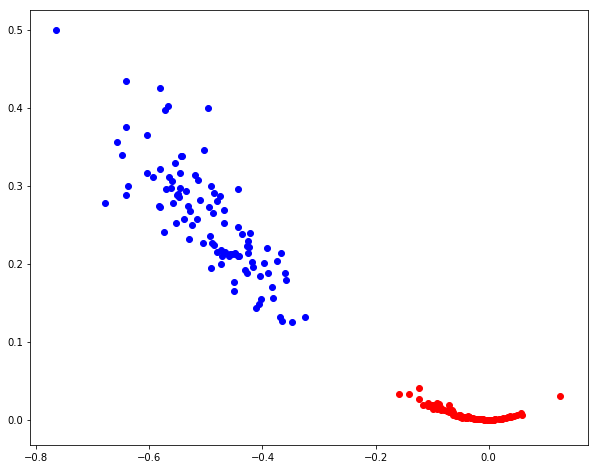

In [67]:
plt.figure(figsize=[10, 8])
plt.scatter(mapped_X[:, 1], mapped_X[:, 2], c="r")

plt.scatter(mapped_X_2[:, 1], mapped_X_2[:, 2], c="b")

plt.show()


Text(0.5, 0, 'x3')

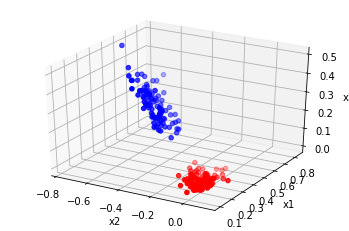

In [66]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(mapped_X[:,1], mapped_X[:,0], mapped_X[:,2], c='r')
ax.scatter(mapped_X_2[:,1], mapped_X_2[:,0], mapped_X_2[:,2], c='b')

ax.set_xlabel('x2')
ax.set_ylabel('x1')
ax.set_zlabel('x3')